In [1]:
%matplotlib inline

import csv

import colour
import numpy as np
from colour.plotting import *

import matplotlib.colors as mc

In [2]:
def ingest(filename):
    points_list = []
    with open(filename, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            points_list.append(np.array(row, dtype=float))

    RGB_list = []
    for point in points_list:
    #     RGB_list.append(colour.models.eotf_inverse_sRGB(point / 255))
        RGB_list.append(point / 1)
        
    return RGB_list                                

In [7]:
red_points = ingest('Red_tile_RGB.csv')
# azur_points = ingest('Azur_tile_RGB.csv')
yellow_points = ingest('Yellow_tile_RGB.csv')
white_points = ingest('White_brick_RGB.csv')
white_points_2 = ingest('White_brick_RGB_2.csv')
lightyellow_points = ingest('LightYellow_brick_RGB.csv')
lightgreen_points = ingest('LightGreen_brick_RGB.csv')
blue_points = ingest('Blue_brick_RGB.csv')

points = red_points + azur_points + yellow_points + white_points 
# points = red_points + yellow_points + white_points 
points += white_points_2 + lightyellow_points + lightgreen_points
points += blue_points

points = [x/256. for x in points]

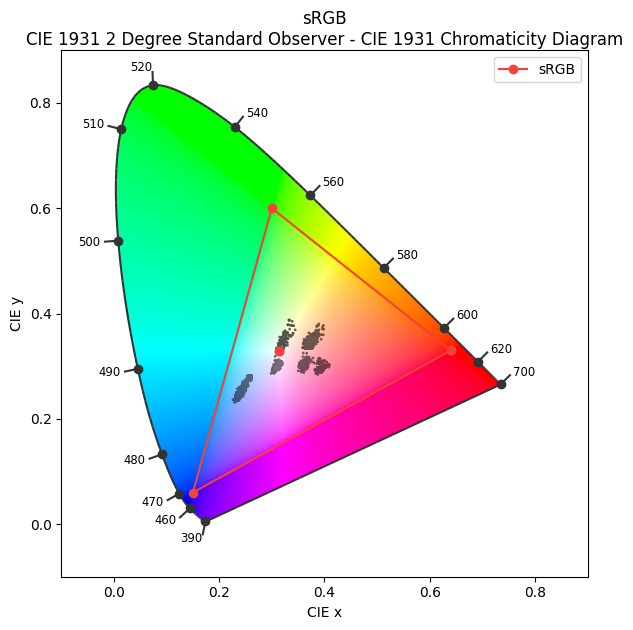

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [8]:
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(points, scatter_kwargs={"s": 1})